In [1]:
import torch
from d2l import torch as d2l

## 4.4.1. The Softmax

In [2]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdims=True), X.sum(1, keepdims=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

In [3]:
X.sum(0, keepdims=False), X.sum(1, keepdims=False)

(tensor([5., 7., 9.]), tensor([ 6., 15.]))

In [4]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdims=True)
    return X_exp / partition  # The broadcasting mechanism is applied here

In [5]:
X = torch.rand((2, 5))
# X_prob = softmax(X)
# X_prob, X_prob.sum(1)

In [6]:
X

tensor([[0.5952, 0.7757, 0.4821, 0.1805, 0.2469],
        [0.7839, 0.5592, 0.6360, 0.3944, 0.6914]])

In [7]:
X_prob = softmax(X)
X_prob

tensor([[0.2243, 0.2687, 0.2004, 0.1482, 0.1584],
        [0.2353, 0.1879, 0.2029, 0.1594, 0.2145]])

In [8]:
X_prob.sum(1, keepdim=True)

tensor([[1.0000],
        [1.0000]])

## 4.4.2. The Model

In [9]:
class SoftmaxRegressionScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W = torch.normal(0, sigma, size=(num_inputs, num_outputs),
                              requires_grad=True)
        self.b = torch.zeros(num_outputs, requires_grad=True)

    def parameters(self):
        return [self.W, self.b]

In [10]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def forward(self, X):
    X = X.reshape((-1, self.W.shape[0]))
    return softmax(torch.matmul(X, self.W) + self.b)

## 4.4.3. The Cross-Entropy Loss



In [11]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

In [12]:
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[list(range(len(y_hat))), y]).mean()

cross_entropy(y_hat, y)

tensor(1.4979)

## 4.4.4. Training

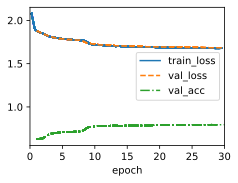

In [15]:
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=30)
trainer.fit(model, data)

## 4.4.5. Prediction

In [16]:
X, y = next(iter(data.val_dataloader()))
preds = model(X).argmax(axis=1)
preds.shape

torch.Size([256])

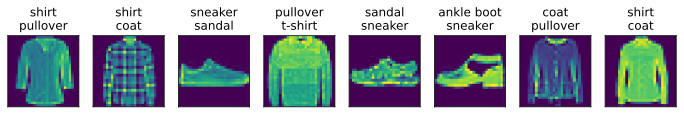

In [17]:
wrong = preds.type(y.dtype) != y
X, y, preds = X[wrong], y[wrong], preds[wrong]
labels = [a+'\n'+b for a, b in zip(
    data.text_labels(y), data.text_labels(preds))]
data.visualize([X, y], labels=labels)